In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

In [3]:
print(os.listdir("/gdrive/My Drive/Goz_Hastaliklari/Diabetic-Normal"))

['Normal', 'Diabetic Retinopathy']


In [6]:

DATADIR = "/gdrive/My Drive/Goz_Hastaliklari/Diabetic-Normal"

CATEGORIES = ["Normal","Diabetic Retinopathy"]

In [5]:
IMG_SIZE = 50

In [7]:
all_data = []

def create_all_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                all_data.append([new_array, class_num])
            except Exception as e:
                pass

create_all_data()


In [8]:
print("Toplam Görüntü Sayısı: ", len(all_data))

Toplam Görüntü Sayısı:  2172


In [9]:
X = []
y = []

for categories, label in all_data:
  X.append(categories)
  y.append(label)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)


In [11]:
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

x_val = np.array(x_val)
y_val = np.array(y_val)


In [12]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(1269, 50, 50, 3)
(761, 50, 50, 3)
(142, 50, 50, 3)
(1269,)
(761,)
(142,)


In [13]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

In [14]:

import tensorflow as tf

train_yCl = tf.keras.utils.to_categorical(y_train, num_classes=2)
test_yCl = tf.keras.utils.to_categorical(y_test, num_classes=2)
valid_yCl = tf.keras.utils.to_categorical(y_val, num_classes=2)


In [15]:

from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential


In [16]:

res = tf.keras.applications.ResNet50V2(
    input_shape=(50, 50, 3),
    include_top = False
)

94668760/94668760 [==============================] - 1s 0us/step


In [17]:
res_model = Sequential()
res_model.add(res)
res_model.add(Dropout(0.25))
res_model.add(MaxPooling2D())
res_model.add(Flatten())
res_model.add(Dense(256, activation='relu'))
res_model.add(BatchNormalization())
res_model.add(Dropout(0.5))
res_model.add(Dense(2, activation='softmax'))

In [18]:
res_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = res_model.fit(x_train, train_yCl,
                        batch_size=120,
                        epochs=10,
                        validation_data=(x_val, valid_yCl))

Epoch 1/10
11/11 [==============================] - 46s 524ms/step - loss: 0.5474 - accuracy: 0.8006 - val_loss: 7.8299 - val_accuracy: 0.6549
Epoch 2/10
11/11 [==============================] - 1s 103ms/step - loss: 0.1346 - accuracy: 0.9598 - val_loss: 24.6232 - val_accuracy: 0.5775
Epoch 3/10
11/11 [==============================] - 1s 105ms/step - loss: 0.0704 - accuracy: 0.9748 - val_loss: 10.8747 - val_accuracy: 0.6690
Epoch 4/10
11/11 [==============================] - 1s 103ms/step - loss: 0.0474 - accuracy: 0.9866 - val_loss: 3.5292 - val_accuracy: 0.8239
Epoch 5/10
11/11 [==============================] - 1s 108ms/step - loss: 0.0230 - accuracy: 0.9898 - val_loss: 1.5377 - val_accuracy: 0.9085
Epoch 6/10
11/11 [==============================] - 1s 113ms/step - loss: 0.0157 - accuracy: 0.9937 - val_loss: 11.0070 - val_accuracy: 0.7394
Epoch 7/10
11/11 [==============================] - 1s 107ms/step - loss: 0.0068 - accuracy: 0.9984 - val_loss: 7.8128 - val_accuracy: 0.8028
Ep

In [20]:
score_valid = res_model.evaluate(x_val, valid_yCl)
print("Validation Accuracy: ", score_valid[1])

score_test = res_model.evaluate(x_test, test_yCl)
print("Test Accuracy: ", score_test[1])

score_train = res_model.evaluate(x_train, train_yCl)
print("Train Accuracy: ", score_train[1])

5/5 [==============================] - 2s 232ms/step - loss: 4.0716 - accuracy: 0.8239
Validation Accuracy:  0.8239436745643616
24/24 [==============================] - 1s 51ms/step - loss: 2.5126 - accuracy: 0.8752
Test Accuracy:  0.875164270401001
40/40 [==============================] - 1s 36ms/step - loss: 2.8922 - accuracy: 0.8802
Train Accuracy:  0.8802206516265869


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Test verisi üzerinde tahminlerde bulunun
y_pred_probs = res_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Gerçek sınıfları alın
y_true_classes = np.argmax(test_yCl, axis=1)

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print(f"F1-Score: {f1}")

# Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

24/24 [==============================] - 2s 30ms/step
Accuracy: 0.8751642575558476
Precision: 0.8975846404466046
Recall: 0.8751642575558476
F1-Score: 0.8730853642388936
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       387
           1       0.99      0.75      0.86       374

    accuracy                           0.88       761
   macro avg       0.90      0.87      0.87       761
weighted avg       0.90      0.88      0.87       761

Confusion Matrix:
[[385   2]
 [ 93 281]]


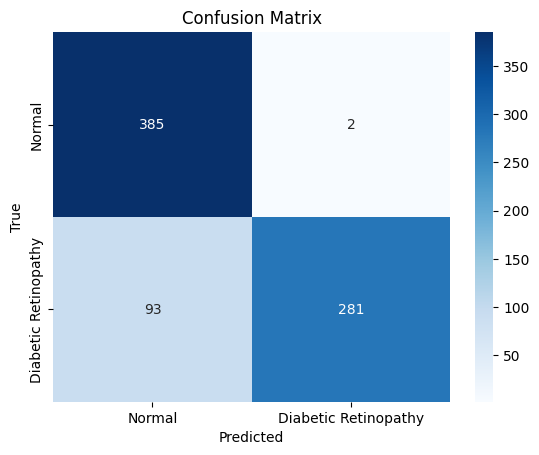

In [22]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)


In [24]:

x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

x_val = np.array(x_val)
y_val = np.array(y_val)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)


(1563, 50, 50, 3)
(435, 50, 50, 3)
(174, 50, 50, 3)
(1563,)
(435,)
(174,)


In [26]:

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')


In [27]:
import tensorflow as tf

train_yCl = tf.keras.utils.to_categorical(y_train, num_classes=2)
test_yCl = tf.keras.utils.to_categorical(y_test, num_classes=2)
valid_yCl = tf.keras.utils.to_categorical(y_val, num_classes=2)

In [28]:

from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

In [29]:

res = tf.keras.applications.ResNet50V2(
    input_shape=(50, 50, 3),
    include_top = False
)

In [30]:

res_model = Sequential()
res_model.add(res)
res_model.add(Dropout(0.25))
res_model.add(MaxPooling2D())
res_model.add(Flatten())
res_model.add(Dense(256, activation='relu'))
res_model.add(BatchNormalization())
res_model.add(Dropout(0.5))
res_model.add(Dense(2, activation='softmax'))

In [31]:
res_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history = res_model.fit(x_train, train_yCl,
                        batch_size=120,
                        epochs=10,
                        validation_data=(x_val, valid_yCl))

Epoch 1/10
14/14 [==============================] - 32s 325ms/step - loss: 0.5261 - accuracy: 0.8221 - val_loss: 3.4796 - val_accuracy: 0.5977
Epoch 2/10
14/14 [==============================] - 2s 110ms/step - loss: 0.1500 - accuracy: 0.9443 - val_loss: 18.7698 - val_accuracy: 0.5460
Epoch 3/10
14/14 [==============================] - 1s 101ms/step - loss: 0.2740 - accuracy: 0.8996 - val_loss: 223.7476 - val_accuracy: 0.4943
Epoch 4/10
14/14 [==============================] - 1s 101ms/step - loss: 0.2165 - accuracy: 0.9213 - val_loss: 127.6338 - val_accuracy: 0.5057
Epoch 5/10
14/14 [==============================] - 1s 102ms/step - loss: 0.0453 - accuracy: 0.9859 - val_loss: 49.3552 - val_accuracy: 0.5460
Epoch 6/10
14/14 [==============================] - 1s 104ms/step - loss: 0.0380 - accuracy: 0.9904 - val_loss: 3.7945 - val_accuracy: 0.6897
Epoch 7/10
14/14 [==============================] - 1s 101ms/step - loss: 0.0240 - accuracy: 0.9942 - val_loss: 6.4438 - val_accuracy: 0.6322

In [33]:

score_valid = res_model.evaluate(x_val, valid_yCl)
print("Validation Accuracy: ", score_valid[1])

score_test = res_model.evaluate(x_test, test_yCl)
print("Test Accuracy: ", score_test[1])

score_train = res_model.evaluate(x_train, train_yCl)
print("Train Accuracy: ", score_train[1])


6/6 [==============================] - 0s 22ms/step - loss: 0.1035 - accuracy: 0.9598
Validation Accuracy:  0.959770143032074
14/14 [==============================] - 1s 99ms/step - loss: 0.1044 - accuracy: 0.9747
Test Accuracy:  0.9747126698493958
49/49 [==============================] - 2s 37ms/step - loss: 0.1503 - accuracy: 0.9597
Train Accuracy:  0.9596928954124451


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Test verisi üzerinde tahminlerde bulunun
y_pred_probs = res_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Gerçek sınıfları alın
y_true_classes = np.argmax(test_yCl, axis=1)

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print(f"F1-Score: {f1}")

# Classification Report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

14/14 [==============================] - 1s 11ms/step
Accuracy: 0.9747126436781609
Precision: 0.9752139220327661
Recall: 0.9747126436781609
F1-Score: 0.97471077272838
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       220
           1       0.96      0.99      0.97       215

    accuracy                           0.97       435
   macro avg       0.98      0.97      0.97       435
weighted avg       0.98      0.97      0.97       435

Confusion Matrix:
[[211   9]
 [  2 213]]


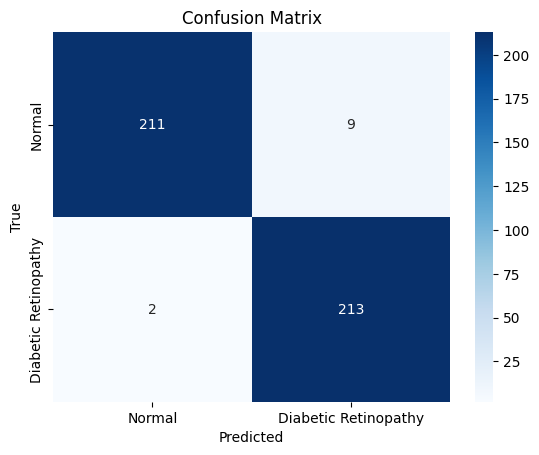

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()